# FMT Assignment

# Semiconductor manufacturing process

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

# PROJECT OBJECTIVE: 

To build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not

# Importing all libraries

In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [299]:
import os

In [300]:
os.chdir('/Users/renuka_b/Downloads')

# 1. Import and understand the data.

A. Import ‘signal-data.csv’ as DataFrame.

In [685]:
df = pd.read_csv('signal-data.csv')

In [686]:
df.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


B. Print 5 point summary and share at least 2 observations. 

In [687]:
df.describe(include = 'all')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,NaN,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000


1. This dataset has almost 590 features that represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. 
2. Total number of datapoints are 1567 and from the count we infer that there might be missing values in the dataset.
3. We see that the 5th feature has same value throughtout the dataset so we can drop that feature as it won't make much difference to the target variable.

# 2. Data cleansing

A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 

In [688]:
percent_missing = (df.isnull().sum() / len(df)) * 100 
print(percent_missing)

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64


In [689]:
for col in df.columns:
    percent_missing = df[col].isnull().sum() / len(df)
    if percent_missing > 0.20:
        df = df.drop(col, axis=1)
    elif percent_missing != 0.00 and percent_missing < 0.20:
    # impute missing values with mean of the feature
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

In [690]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [691]:
percent_missing = (df.isnull().sum() / len(df)) * 100 
print(percent_missing)

Time         0.0
0            0.0
1            0.0
2            0.0
3            0.0
            ... 
586          0.0
587          0.0
588          0.0
589          0.0
Pass/Fail    0.0
Length: 560, dtype: float64


Now we see that all the missing values have been imputed with mean of those features.

B. Identify and drop the features which are having same value for all the rows. 

In [692]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)

C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [693]:
# Deleting the first column
df = df.drop(columns = ['Time'], axis = 1)

We are deleting the "Time" column as we are not going to use it for further analysis. 

D. Check for multi-collinearity in the data and take necessary action.

In [694]:
#Function to remove the highly collinear features from data
def drop_collinear_features(x, threshold):
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [695]:
#Remove columns having more than 70% correlation
df_new = drop_collinear_features(df,0.70)

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
54 | 53 | 0.94
60 | 43 | 0.9
60 | 50 | 0.7
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
101 | 94 | 0.73
101 | 96 | 0.79
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.86
125 | 122 | 0.71
127 | 122 | 0.96
130 | 122 | 0.83
130 | 127 | 0.79
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.81
163 | 26 | 0.71
163 | 159 | 0.76
164 | 26 | 0.77
164 | 159 | 0.8
164 | 163 | 0.92
165 | 26 | 0.74
165 | 159 | 0.79
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0


E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. 

In [696]:
df_new['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

We infer that the target variable is imbalanced. Let's perform label encoding on the target vairbale.

In [697]:
#label encoding the target class
df_new['Pass/Fail']= df_new['Pass/Fail'].replace([-1,1],[0,1])

Now the target variable is encoded as 0 and 1

From the above output, we see that outliers are present in most of the features. Let's try to impute it with the median.

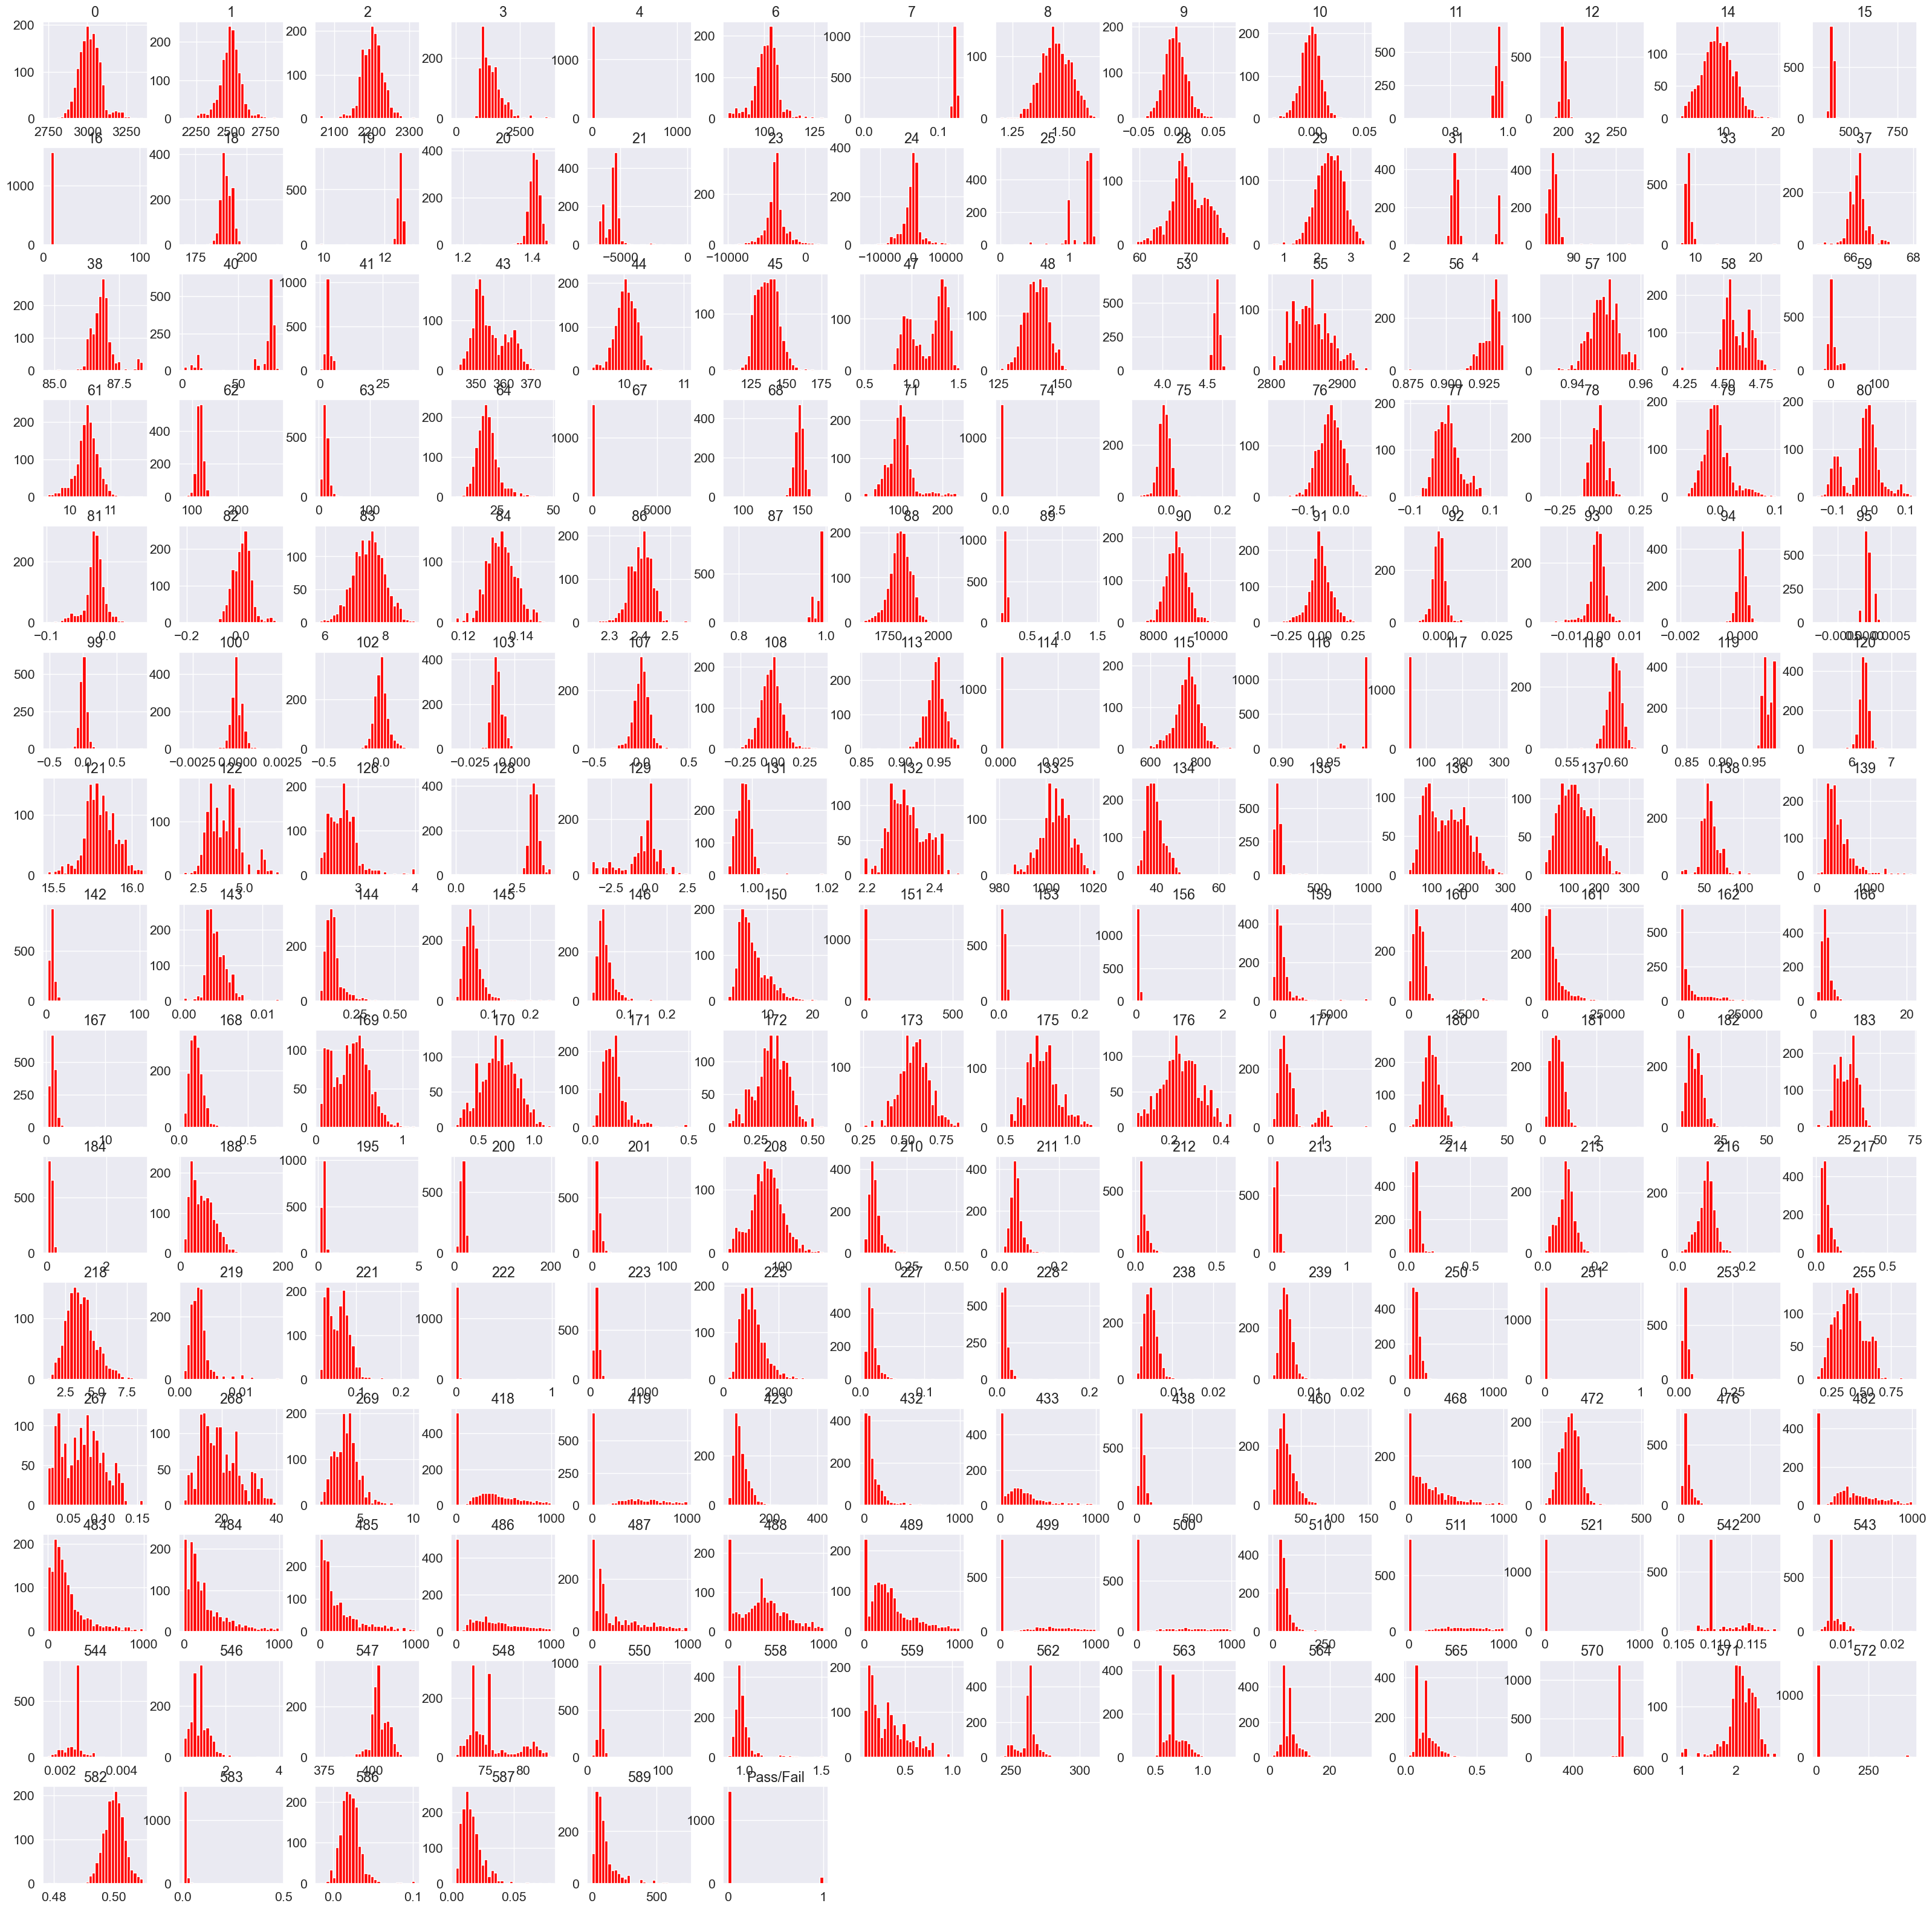

In [698]:
#plotting histogram to check for the distribution of values in a variable
df_new.hist(bins = 30, figsize = (40, 40), color = 'red')
plt.show()

We still see that there are attributes with zero signals, so we will drop them as well while scaling. 

In [699]:
from scipy.stats import zscore
df_scaled= df_new.apply(zscore)  
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,2.448584e-15,1.000319,-3.692123,-0.650555,-0.035570,0.572948,4.654374
1,1567.0,-3.814009e-15,1.000319,-4.203130,-0.535711,0.038151,0.534833,4.371324
2,1567.0,-8.706076e-15,1.000319,-4.762680,-0.662116,0.013901,0.596093,3.905799
3,1567.0,-2.720649e-16,1.000319,-3.176669,-0.710897,-0.248020,0.440868,5.274818
4,1567.0,1.813766e-17,1.000319,-0.062682,-0.056687,-0.051349,-0.047560,19.797386
...,...,...,...,...,...,...,...,...
583,1567.0,-5.668018e-18,1.000319,-0.542709,-0.216539,-0.088401,0.068860,26.867231
586,1567.0,1.360324e-16,1.000319,-3.105874,-0.648441,-0.077604,0.497282,6.586209
587,1567.0,9.068829e-18,1.000319,-1.508184,-0.667458,-0.190289,0.434576,7.205831
589,1567.0,1.768422e-16,1.000319,-1.062218,-0.589367,-0.294644,0.160709,6.795495


After scaling, number of features have dropped to 202.

Combining both the dataframes

In [700]:
#dropping NaN
df_new.dropna(axis=1,inplace=True)
row,column= df_new.shape
print('After dropping NaN variables the dataset contains', row, 'rows and', column, 'columns')

After dropping NaN variables the dataset contains 1567 rows and 202 columns


# 3. Data analysis & visualisation:

A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

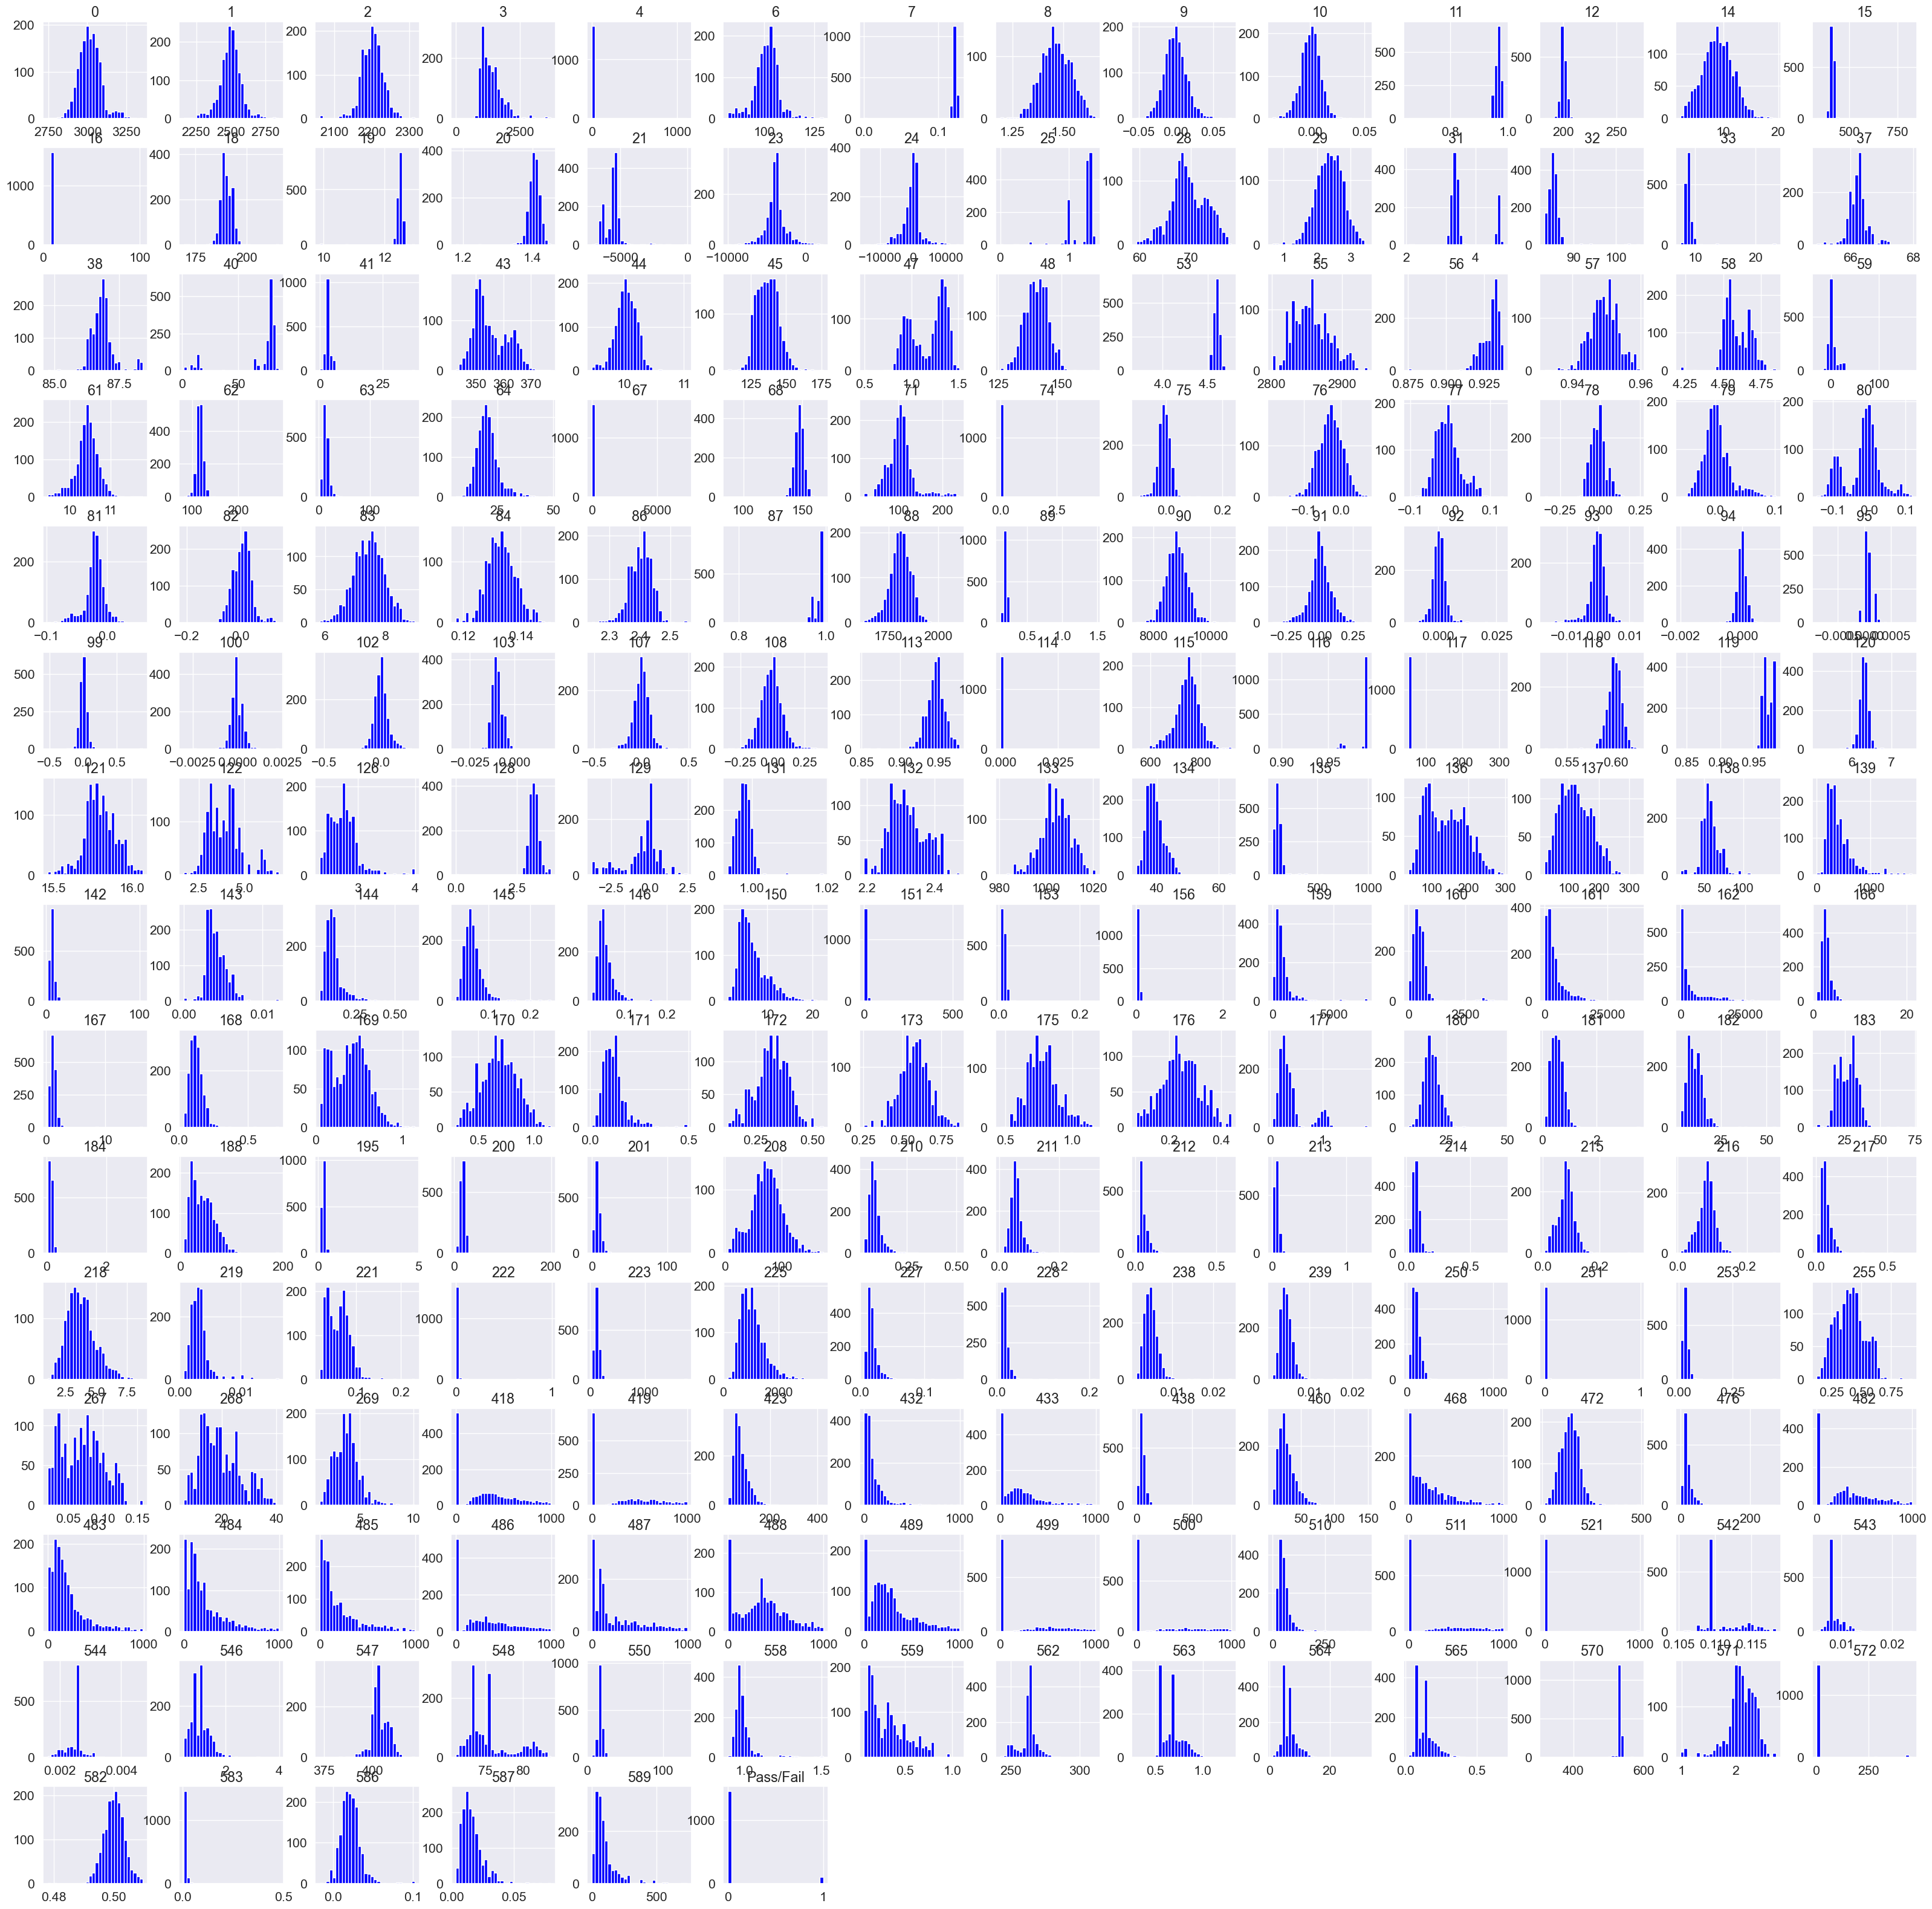

In [701]:
#plotting histogram to check for the distribution of values in a variable
df_new.hist(bins = 30, figsize = (40, 40), color = 'Blue')
plt.show()

From the above graph, we see that the features are not normally distributed and skewed to the right.

<Axes: xlabel='Pass/Fail', ylabel='Count'>

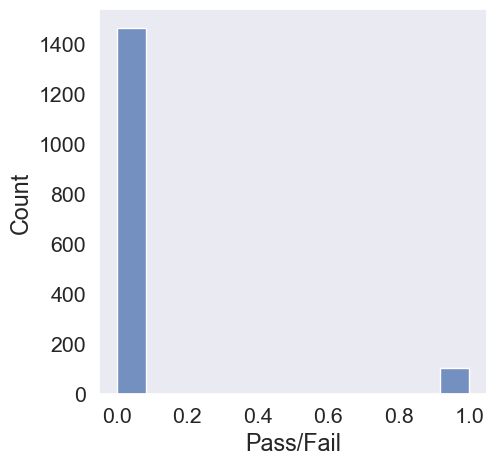

In [702]:
sns.histplot(df_new['Pass/Fail'])

From the above graph, we see that the target variable is imbalanced and vary few datapoints/signals represent Pass category.

B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [703]:
unique_vals = df_new['Pass/Fail'].unique()

In [704]:
targets = [df_new.loc[df_new['Pass/Fail'] == val] for val in unique_vals]

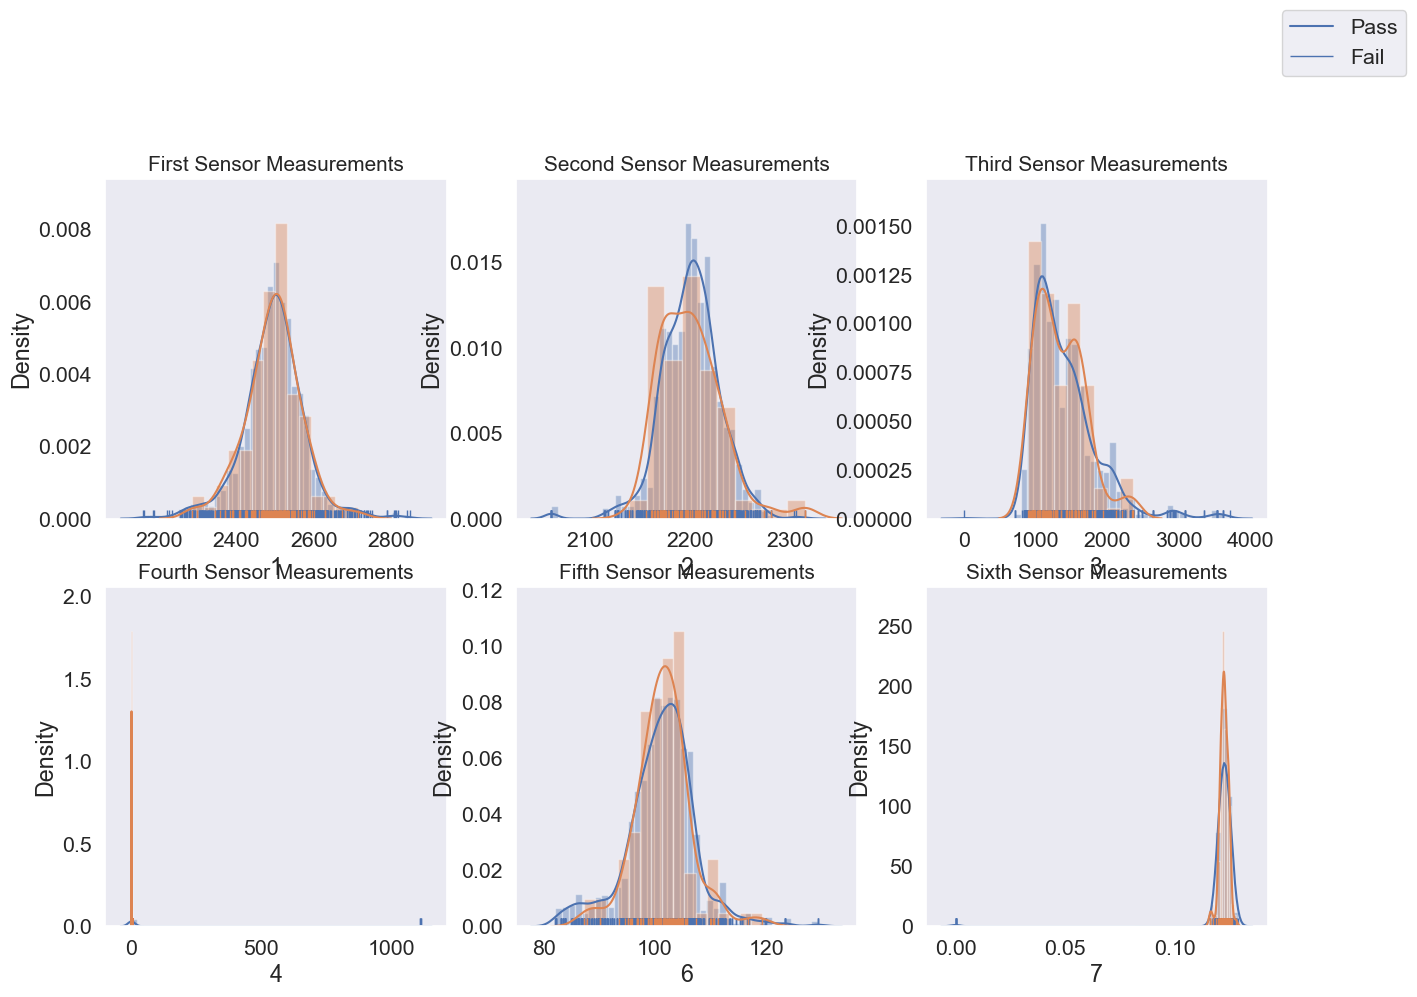

In [705]:
fig = plt.figure(figsize=(15,15))

plt.subplot(3, 3, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 15)

plt.subplot(3, 3, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 15)

plt.subplot(3, 3, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 15)

plt.subplot(3, 3, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 15)

plt.subplot(3, 3, 5)
for target in targets:
    sns.distplot(target['6'], hist=True, rug=True)
plt.title('Fifth Sensor Measurements', fontsize = 15)

plt.subplot(3, 3, 6)
for target in targets:
    sns.distplot(target['7'], hist=True, rug=True)
plt.title('Sixth Sensor Measurements', fontsize = 15)

fig.legend(labels=['Pass','Fail'])
plt.show();

Text(0.5, 1.0, 'Correlation heatmap for the Data')

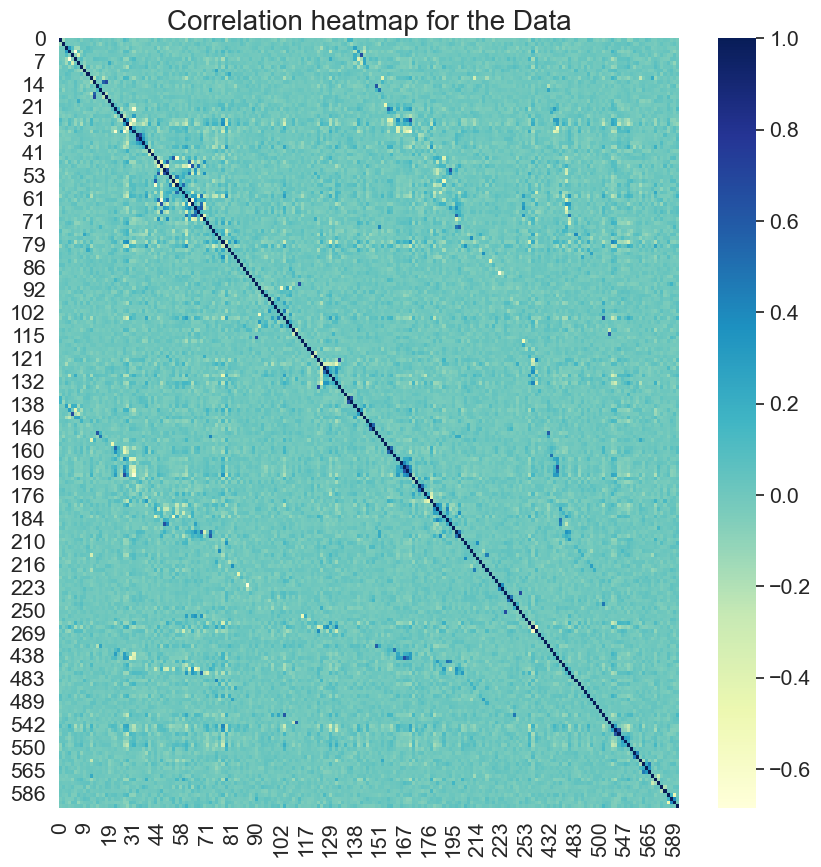

In [706]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(df_new.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

# 4. Data pre-processing

A. Segregate predictors vs target attributes.

In [795]:
X = df_new.drop('Pass/Fail',axis=1)
y = df_new["Pass/Fail"]

B. Check for target balancing and fix it if found imbalanced.

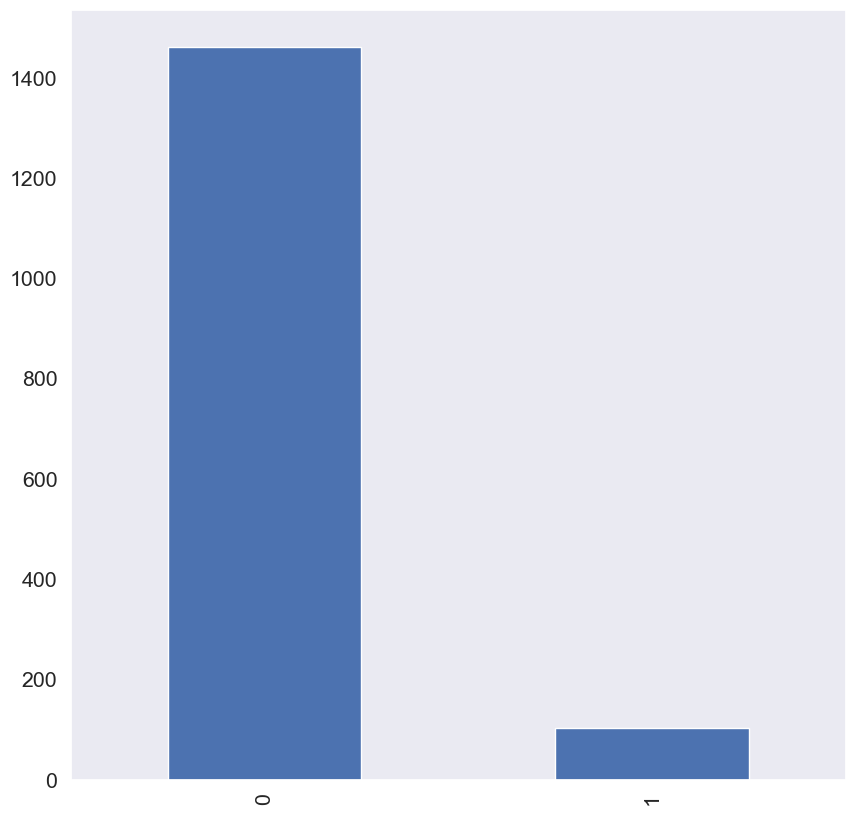

In [708]:
y.value_counts().plot(kind="bar");

In [711]:
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE(random_state=1).fit_resample(X, y.values.ravel())

In [712]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_res[y_res[:] == 0]), (len(y_res[y_res[:] == 0])/len(y_res)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_res[y_res[:] == 1]), (len(y_res[y_res[:] == 1])/len(y_res)) * 100))

SMOTE Training Fail    : 1463 (50.00%)
SMOTE Training Pass  : 1463 (50.00%)


Now the target variable is balanced using SMOTE technique. 

C. Perform train-test split and standardise the data or vice versa if required. 

In [713]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, stratify=y_res, random_state = 1)

In [714]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

D. Check if the train and test data have similar statistical characteristics when compared with original data. 

In [715]:
x_train_stats = pd.DataFrame(x_train)
x_train_stats.describe()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
count,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,...,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03,2.048000e+03
mean,-6.869505e-16,-4.033666e-15,8.209579e-15,-2.333203e-16,6.938894e-18,3.447763e-16,-2.532696e-16,-1.262879e-15,-3.469447e-18,6.938894e-18,...,-3.252607e-16,-2.324529e-16,-3.830269e-15,-7.467985e-16,-3.989864e-17,-8.054321e-15,-1.647987e-17,-2.428613e-17,-2.602085e-17,3.469447e-17
std,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,...,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00
min,-3.668960e+00,-4.615436e+00,-5.145996e+00,-3.796840e+00,-5.359432e-02,-3.638804e+00,-1.941443e+01,-4.376753e+00,-3.847584e+00,-3.974639e+00,...,-2.428479e+00,-1.648222e+00,-1.036998e+01,-3.902416e+00,-2.878954e-01,-6.954521e+00,-6.205371e-01,-2.463493e+00,-1.584607e+00,-1.203493e+00
25%,-6.556500e-01,-5.634813e-01,-6.761336e-01,-7.447679e-01,-4.412647e-02,-4.543568e-01,-1.486938e-01,-6.560452e-01,-5.952637e-01,-5.957614e-01,...,-6.944746e-01,-7.361161e-01,5.791119e-02,-3.756460e-01,-2.295541e-01,-6.130880e-01,-2.471508e-01,-6.214253e-01,-6.959035e-01,-6.046346e-01
50%,-1.451867e-01,4.924945e-02,-5.110843e-02,-2.031649e-01,-3.868032e-02,4.840000e-02,2.908885e-02,-1.659367e-02,-2.704216e-02,7.988492e-02,...,-6.106893e-02,-9.681903e-02,1.334179e-01,1.237543e-01,-2.129083e-01,5.048402e-02,-1.030368e-01,-5.992766e-02,-1.501105e-01,-2.853916e-01
75%,5.326485e-01,5.553251e-01,5.990152e-01,5.460884e-01,-3.446300e-02,5.364326e-01,2.434322e-01,6.906870e-01,5.576539e-01,6.339384e-01,...,4.342004e-01,2.573107e-01,2.233023e-01,6.813687e-01,-1.936381e-01,6.357856e-01,7.907111e-02,5.237040e-01,4.877934e-01,2.295673e-01
max,4.764360e+00,4.890971e+00,4.276376e+00,6.158806e+00,2.614303e+01,5.357461e+00,8.796089e-01,2.991794e+00,5.744892e+00,4.620751e+00,...,1.170410e+01,6.883088e+00,2.922553e+00,2.247934e+00,6.186953e+00,2.896249e+00,3.020676e+01,7.220557e+00,7.866039e+00,7.777250e+00


In [716]:
x_test_stats = pd.DataFrame(x_test)
x_test_stats.describe()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,-0.037606,0.005734,0.055589,0.018751,-0.008100,0.010293,-0.021699,-0.024662,0.023893,-0.084677,...,0.007663,0.036541,0.040398,-0.010692,0.005878,-0.044704,-0.026012,-0.025471,0.075823,0.003361
std,0.956854,1.010784,0.968067,1.072840,0.881728,1.041734,1.169335,1.010243,0.988659,1.046142,...,0.956444,0.996800,0.886364,1.033050,1.042356,1.010801,0.323849,0.961554,1.092145,0.985943
min,-3.060302,-4.672733,-5.145996,-1.563179,-0.053594,-3.616734,-19.414427,-4.226342,-2.920486,-4.211753,...,-2.495862,-1.675175,-9.819846,-3.886684,-0.267707,-2.737160,-0.548480,-3.433678,-1.709451,-1.203493
25%,-0.660278,-0.561132,-0.606978,-0.729056,-0.043572,-0.471761,-0.153349,-0.626986,-0.572834,-0.718207,...,-0.694475,-0.740479,0.075117,-0.403013,-0.229866,-0.705439,-0.234050,-0.632816,-0.672114,-0.583449
50%,-0.184074,0.054248,0.030892,-0.214033,-0.038598,0.005190,0.031678,-0.059682,0.024166,0.002396,...,-0.036369,-0.093802,0.146788,0.168918,-0.213131,-0.041760,-0.092853,-0.130900,-0.113085,-0.251954
75%,0.526159,0.526971,0.632671,0.510836,-0.034115,0.528935,0.234068,0.640712,0.563609,0.577695,...,0.442062,0.409162,0.237622,0.700396,-0.193704,0.632226,0.092514,0.518269,0.566088,0.252978
max,3.522147,4.381279,3.899014,6.420922,26.087134,4.244829,1.038653,2.868298,3.643968,6.209416,...,3.824718,6.673880,2.795945,2.247934,6.216083,2.680763,1.999718,5.467103,7.866039,5.851231


In [717]:
df_new.describe()

,0,1,2,3,4,6,7,8,9,10,...,565,570,571,572,582,583,586,587,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,0.000146,...,0.145610,530.523623,2.101836,28.450165,0.500096,0.015318,0.021458,0.016475,99.670066,0.066369
std,73.480613,80.227793,29.380932,439.712852,56.103066,6.209271,0.008936,0.073849,0.015107,0.009296,...,0.073713,17.499736,0.275112,86.304681,0.003403,0.017174,0.012354,0.008805,93.861936,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,0.022400,317.196400,0.980200,3.540000,0.477800,0.006000,-0.016900,0.003200,0.000000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,97.937800,0.121100,1.411250,-0.010800,-0.005600,...,0.087700,530.702700,1.982900,7.500000,0.497900,0.011600,0.013450,0.010600,44.368600,0.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,101.492200,0.122400,1.461600,-0.001300,0.000400,...,0.142800,532.398200,2.118600,8.650000,0.500200,0.013800,0.020500,0.014800,72.023000,0.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,104.530000,0.123800,1.516850,0.008400,0.005900,...,0.166850,534.356400,2.290650,10.130000,0.502350,0.016500,0.027600,0.020300,114.749700,0.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,0.689200,589.508200,2.739500,454.560000,0.509800,0.476600,0.102800,0.079900,737.304800,1.000000


# 5. Model training, testing and tuning

A. Use any Supervised Learning technique to train a model.

In [718]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<Axes: >

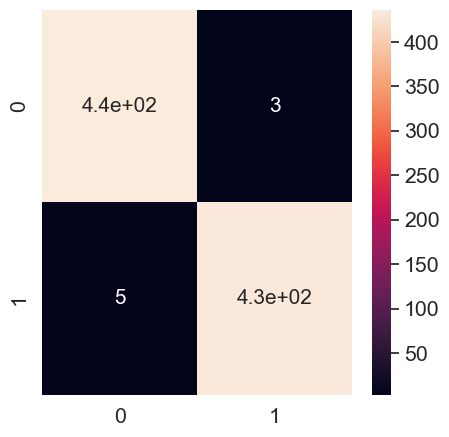

In [721]:
from sklearn.metrics import confusion_matrix, classification_report
cm_rf_normal= confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm_rf_normal, annot = True, annot_kws = {"size": 15})

In [723]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision_rf_normal, recall_rf_normal, f1_score_rf_normal, support_rf_normal = precision_recall_fscore_support(y_test, y_pred, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rf_normal)
print('Recall Score :', '%0.2f' % recall_rf_normal)
print('F1-Score:', '%0.2f' % f1_score_rf_normal)
rf_normal_acc_test = accuracy_score(y_test, y_pred)
rf_normal_acc_train = model.score(x_train,y_train)
print('Train Accuracy Score :','%0.2f' % rf_normal_acc_train)
print('Test Accuracy Score :','%0.2f' % rf_normal_acc_test)

Precision Score : 0.99
Recall Score : 0.99
F1-Score: 0.99
Train Accuracy Score : 1.00
Test Accuracy Score : 0.99


In [724]:
print("Classification Report")
print(classification_report(y_test, y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       439
           0       0.99      0.99      0.99       439

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



After balancing the dataset, we see that RF model performs well in both train and test datasets with 99% accuracy. 
Also, we can see from the confusion matrix that the error is low. Most of the pass & fail classes have been identified accurately.

In [725]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train) 
y_pred_lr = lr.predict(x_test)

<Axes: >

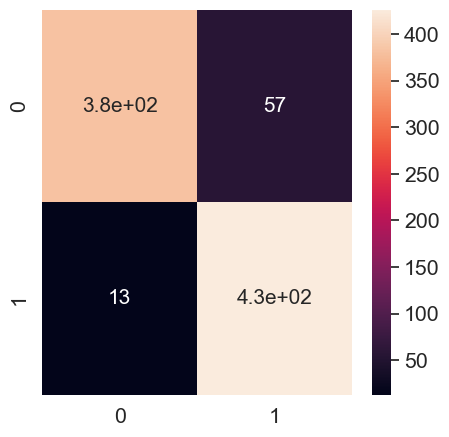

In [726]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm_lr, annot = True, annot_kws = {"size": 15})

In [727]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision_lr, recall_lr, f1_score_lr, support_lr = precision_recall_fscore_support(y_test, y_pred_lr, average = 'macro')
print('Precision Score :', '%0.2f' % precision_lr)
print('Recall Score :', '%0.2f' % recall_lr)
print('F1-Score:', '%0.2f' % f1_score_lr)
lr_acc_test = accuracy_score(y_test, y_pred_lr)
lr_acc_train = lr.score(x_train,y_train)
print('Train Accuracy Score :','%0.2f' % lr_acc_train)
print('Test Accuracy Score :','%0.2f' % lr_acc_test)

Precision Score : 0.92
Recall Score : 0.92
F1-Score: 0.92
Train Accuracy Score : 0.95
Test Accuracy Score : 0.92


In [728]:
print("Classification Report for Logistic Regression")
print(classification_report(y_test, y_pred_lr, labels=[1, 0]))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       439
           0       0.97      0.87      0.92       439

    accuracy                           0.92       878
   macro avg       0.92      0.92      0.92       878
weighted avg       0.92      0.92      0.92       878



We infer that the logistic regression yields 92% accuracy but the confusion matrix shows that there are more misclassified data points when compared to random forest model. 

B. Use cross validation techniques

In [762]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [730]:
kfold = model_selection.KFold(n_splits=10)

In [735]:
from sklearn.ensemble import RandomForestClassifier
model_cv = RandomForestClassifier()

In [739]:
results = model_selection.cross_val_score(model_cv, x_res, y_res, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.59385666 0.96928328 0.98634812 0.99317406 0.98634812 1.
 0.97945205 0.99657534 0.99657534 1.        ]
Accuracy: 95.016% (11.913%)


C. Apply hyper-parameter tuning techniques to get the best accuracy

In [748]:
rfc=RandomForestClassifier(random_state=100)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [749]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rf_param_grid)
CV_rfc.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [750]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [757]:
rfc1=RandomForestClassifier(random_state=100, max_depth = 8 ,max_features = 'log2',n_estimators = 200,criterion = 'entropy')
rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=200, random_state=100)

In [758]:
pred=rfc1.predict(x_test)

In [766]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision_rf_tune, recall_rf_tune, f1_score_rf_tune, support_rf_tune = precision_recall_fscore_support(y_test, pred, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rf_tune)
print('Recall Score :', '%0.2f' % recall_rf_tune)
print('F1-Score:', '%0.2f' % f1_score_rf_tune)
rf_tune_acc_test = accuracy_score(y_test, pred)
rf_tune_acc_train = rfc1.score(x_train,y_train)
print('Train Accuracy Score :','%0.2f' % rf_tune_acc_train)
print('Test Accuracy Score :','%0.2f' % rf_tune_acc_test)

Precision Score : 0.97
Recall Score : 0.96
F1-Score: 0.96
Train Accuracy Score : 0.99
Test Accuracy Score : 0.96


In [761]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       439
           1       0.95      0.98      0.97       439

    accuracy                           0.96       878
   macro avg       0.97      0.96      0.96       878
weighted avg       0.97      0.96      0.96       878



D. Use any other technique/method which can enhance the model performance

In [796]:
#scaling the independent variables with z-score before PCA
X_Scaled= X.apply(zscore)

In [797]:
cov_matrix = np.cov(X_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00063857 -0.14393166  0.00475868 ...  0.01845493 -0.02589702
   0.00417663]
 [-0.14393166  1.00063857  0.00577089 ... -0.00940915  0.01727747
   0.04482545]
 [ 0.00475868  0.00577089  1.00063857 ... -0.02551161 -0.02936364
  -0.03291098]
 ...
 [ 0.01845493 -0.00940915 -0.02551161 ...  1.00063857  0.16801987
  -0.48686973]
 [-0.02589702  0.01727747 -0.02936364 ...  0.16801987  1.00063857
   0.39106264]
 [ 0.00417663  0.04482545 -0.03291098 ... -0.48686973  0.39106264
   1.00063857]]


In [798]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.04772949  0.011982    0.03114068 ... -0.00953206 -0.02459973
  -0.00741677]
 [-0.00452198  0.01427774 -0.03043821 ...  0.04529956 -0.01781583
   0.01872907]
 [-0.00787772  0.00680364 -0.07305504 ... -0.12749673 -0.11572508
   0.06125828]
 ...
 [ 0.05174799  0.03252716  0.03359023 ... -0.05494131 -0.01061435
   0.04929592]
 [-0.01956712 -0.03332835 -0.05979379 ... -0.02278009 -0.00949002
   0.02353863]
 [-0.03259126 -0.02323691 -0.08523706 ... -0.00605896  0.02731437
  -0.01235385]]

 Eigen Values 
%s [7.77130201e+00 4.80390120e+00 3.92874623e+00 3.68318376e+00
 3.41423557e+00 3.18217396e+00 3.08440544e+00 2.82314963e+00
 2.64253510e+00 2.58905512e+00 2.49392197e+00 2.40104140e+00
 2.33165406e+00 2.27901383e+00 2.19292677e+00 2.15967414e+00
 2.13009406e+00 2.09365407e+00 2.07287335e+00 2.04452321e+00
 2.01668853e+00 1.98038253e+00 1.92737828e+00 1.90725526e+00
 1.87359569e+00 1.87022205e+00 1.83378250e+00 1.82276113e+00
 2.04335502e-04 1.78506283e+00 1.78035670e+0

In [799]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  3.86385207   6.25232746   8.20568022  10.03694056  11.73448122
  13.31664203  14.85019282  16.25384854  17.56770363  18.85496875
  20.09493415  21.28871979  22.4480064   23.58112056  24.67143266
  25.74521172  26.80428372  27.84523794  28.87586009  29.89238669
  30.89507403  31.87971021  32.83799295  33.78627062  34.71781293
  35.64767788  36.55942526  37.46569288  38.35321709  39.23840145
  40.09875423  40.95090939  41.78706331  42.61508949  43.43340183
  44.24240586  45.03499701  45.82367056  46.59629804  47.36200178
  48.11976707  48.86372891  49.58987215  50.31136014  51.02606625
  51.73112411  52.42494636  53.11070891  53.79424767  54.46577838
  55.12371029  55.77443068  56.42092116  57.05190858  57.67801001
  58.29610494  58.90655675  59.51427721  60.11580934  60.70773753
  61.29607234  61.87934209  62.45123907  63.01595105  63.57408538
  64.12429047  64.67218745  65.21541232  65.75486287  66.2885028
  66.81508785  67.33850078  67.8576334   68.366

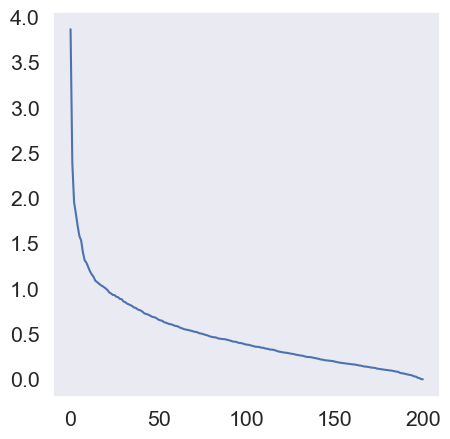

In [800]:
plt.plot(var_exp)

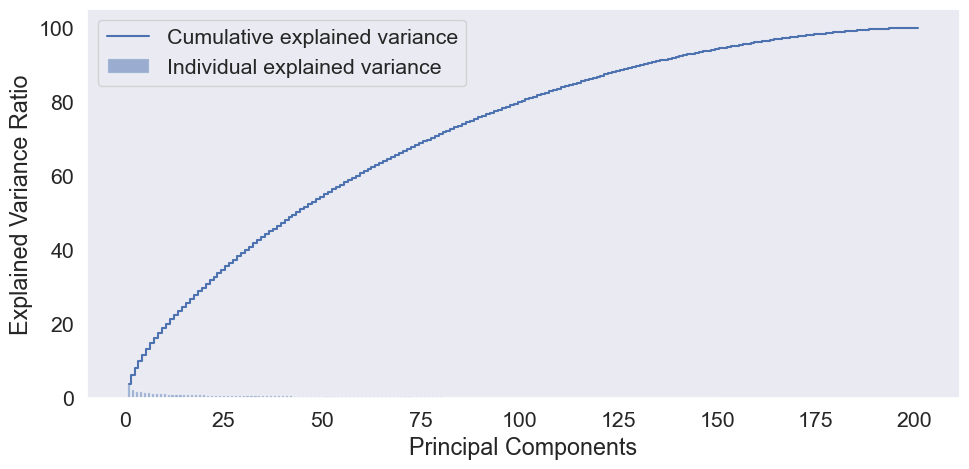

In [801]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [802]:
len(cum_var_exp)

201

In [854]:
from sklearn.decomposition import PCA

# We are generating only 130 PCA dimensions (dimensionality reduction from 201 to 130)
# For 130 components we are getting approximately 90% of the variance
pca = PCA(n_components = 130)
data_reduced = pca.fit_transform(X_Scaled)
data_reduced.transpose()

array([[ 3.08411618,  1.68507399,  1.42518064, ..., -2.1554766 ,
        -3.07639362, -2.88015235],
       [-1.14944158, -1.808049  ,  0.30536352, ..., -1.01428894,
        -0.73663076,  2.13742514],
       [-0.38484553, -0.06910965,  2.83049285, ..., -1.36981612,
         1.76426062,  2.27036098],
       ...,
       [ 0.2113122 , -0.01166638,  0.23632244, ..., -0.23935719,
        -1.10385441,  0.25078236],
       [-0.21786138, -1.75001103, -0.68022087, ..., -0.49321817,
         0.59627447, -0.03179018],
       [-1.03050319, -0.32683211,  1.600393  , ..., -0.02628297,
        -0.11034471, -0.17686989]])

In [804]:
print(pca.components_)

[[-0.04772946  0.00452189  0.00787765 ... -0.05174799  0.0195671
   0.03259123]
 [-0.01198165 -0.01427847 -0.00680421 ... -0.0325267   0.03332863
   0.02323683]
 [-0.03114202  0.03043805  0.07305652 ... -0.03359096  0.05979422
   0.08523744]
 ...
 [-0.07085785 -0.08175945 -0.06637077 ...  0.00297737 -0.01216017
   0.03670081]
 [-0.02782101 -0.01230033  0.0218308  ... -0.01104547  0.01465649
   0.00549874]
 [-0.03225638 -0.02751014 -0.06639388 ...  0.06691691 -0.01747292
  -0.01658924]]


In [777]:
df_comp = pd.DataFrame(pca.components_,columns=list(x_res))
df_comp.head()

,0,1,2,3,4,6,7,8,9,10,...,564,565,570,571,572,582,583,586,587,589
0,-0.099023,0.024246,0.025686,-0.048169,-0.017684,0.066621,0.001554,0.049417,-0.040589,0.018960,...,-0.033000,-0.015621,-0.016199,0.123354,-0.024696,-0.000305,0.010370,-0.053660,0.042820,0.062550
1,0.014909,0.005694,-0.023789,-0.024674,0.012002,0.079088,0.002837,0.030111,-0.048395,0.024423,...,0.036674,0.027102,0.002112,-0.040889,-0.002073,-0.045883,0.025432,-0.011135,0.064575,0.044010
2,0.003815,0.076909,-0.018246,0.005894,0.024275,-0.050950,0.004259,0.053731,-0.020104,0.067331,...,-0.014660,-0.003552,0.031915,-0.017588,0.002487,0.066354,-0.001244,0.020111,0.028046,0.014044
3,-0.032110,0.008221,-0.164887,-0.172109,-0.011770,0.097732,0.033993,0.052108,-0.041390,-0.002741,...,0.020158,-0.002674,0.087304,-0.033963,-0.045878,0.028690,-0.000229,0.056681,0.023280,-0.032767
4,-0.018576,0.047813,0.033178,0.039025,0.013618,-0.065858,-0.010828,-0.048107,-0.036623,0.042252,...,0.061548,0.171367,0.011918,-0.146356,-0.019608,-0.029069,0.000990,0.046470,0.053215,0.015939


<Axes: >

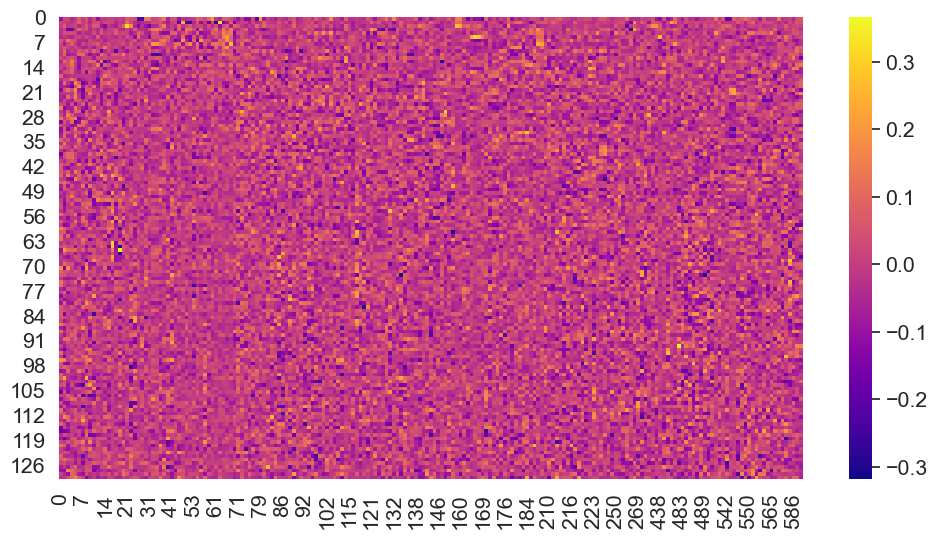

In [805]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [806]:
data_reduced.shape

(1567, 130)

In [807]:
df_reduced = pd.DataFrame(data_reduced)
df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,3.084102,-1.149539,-0.384638,-0.556256,-1.237755,-0.260536,0.712122,2.836430,2.304088,-3.139586,...,-0.520574,0.562866,-0.726347,0.489585,-0.180478,0.228587,0.031113,0.437696,-0.033746,-0.268699
1,1.685058,-1.808104,-0.069125,-0.711734,-0.129164,-0.668088,-0.050111,3.109626,-0.059983,-0.819713,...,0.224343,-0.759352,0.978470,-0.136056,1.029060,-0.191262,0.197677,0.681839,1.013114,0.629964
2,1.425176,0.305357,2.830858,0.183324,-1.737741,-1.302976,-0.550240,1.573504,-0.007862,-1.047351,...,-1.546342,0.230196,1.252220,0.287395,-0.165579,0.309552,1.510278,0.962167,-0.257890,0.817764
3,3.812153,-0.879664,4.833175,0.012324,-0.967115,-0.759352,-1.764597,-0.736190,-1.086906,0.516490,...,1.610379,0.948373,-1.677558,2.684461,-0.311867,-0.210872,-0.085803,-0.130903,-0.527336,-1.720677
4,2.399724,2.906202,2.503518,0.878933,2.946912,0.112300,0.777981,-0.874065,-3.301371,-2.058338,...,0.493422,-0.595364,-1.124521,0.981365,-0.210841,-0.093568,1.174409,0.476645,0.126379,-1.145868


In [808]:
df_red1 = df_reduced
df_red1["Pass/Fail"] = df_new["Pass/Fail"]
df_red1.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,Pass/Fail
0,3.084102,-1.149539,-0.384638,-0.556256,-1.237755,-0.260536,0.712122,2.836430,2.304088,-3.139586,...,0.562866,-0.726347,0.489585,-0.180478,0.228587,0.031113,0.437696,-0.033746,-0.268699,0
1,1.685058,-1.808104,-0.069125,-0.711734,-0.129164,-0.668088,-0.050111,3.109626,-0.059983,-0.819713,...,-0.759352,0.978470,-0.136056,1.029060,-0.191262,0.197677,0.681839,1.013114,0.629964,0
2,1.425176,0.305357,2.830858,0.183324,-1.737741,-1.302976,-0.550240,1.573504,-0.007862,-1.047351,...,0.230196,1.252220,0.287395,-0.165579,0.309552,1.510278,0.962167,-0.257890,0.817764,1
3,3.812153,-0.879664,4.833175,0.012324,-0.967115,-0.759352,-1.764597,-0.736190,-1.086906,0.516490,...,0.948373,-1.677558,2.684461,-0.311867,-0.210872,-0.085803,-0.130903,-0.527336,-1.720677,0
4,2.399724,2.906202,2.503518,0.878933,2.946912,0.112300,0.777981,-0.874065,-3.301371,-2.058338,...,-0.595364,-1.124521,0.981365,-0.210841,-0.093568,1.174409,0.476645,0.126379,-1.145868,0


In [809]:
X=df_red1.drop('Pass/Fail', axis = 1)
Y=df_red1['Pass/Fail']

In [810]:
# splitting data into training and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=.3,random_state=100,stratify=Y)

In [811]:
new_grid = CV_rfc.fit(X_train, Y_train)

In [815]:
new_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [816]:
rfc_tune=RandomForestClassifier(random_state=100, max_depth = 4 ,max_features = 'auto',n_estimators = 100,criterion = 'gini')
rfc_tune.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features='auto', random_state=100)

In [817]:
pred_rf_pca =rfc_tune.predict(X_test)

In [820]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision_rf_pca, recall_rf_pca, f1_score_rf_pca, support_rf_pca = precision_recall_fscore_support(Y_test, pred_rf_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rf_pca)
print('Recall Score :', '%0.2f' % recall_rf_pca)
print('F1-Score:', '%0.2f' % f1_score_rf_pca)
rf_pca_acc_test = accuracy_score(Y_test, pred_rf_pca)
rf_pca_acc_train = rfc_tune.score(X_train,Y_train)
print('Train Accuracy Score :','%0.2f' % rf_pca_acc_train)
print('Test Accuracy Score :','%0.2f' % rf_pca_acc_test)

Precision Score : 0.47
Recall Score : 0.50
F1-Score: 0.48
Train Accuracy Score : 0.94
Test Accuracy Score : 0.93


After performing PCA, model accuracy has dropped to 94% and 93% in train and test datasets from 99% and 96% when compared to hyperparamter tuning. So it clearly indicates that PCA is not effective on this dataset. 
Also, we see that the precision and recall scores are very low. 

E. Display and explain the classification report in detail.

In [821]:
print(classification_report(Y_test,pred_rf_pca))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



After performing PCA, we see that the model is not performing well and it has only predicted the failure class. 93% Accuracy is only on the test data for predicting the failure classes. 
Also, we see that the precision and recall scores are very low. Hence we say that PCA is not effective on this dataset.

F. Apply the above steps for all possible models that you have learnt so far.

In [ ]:
SVM

In [822]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,Y_train)

SVC()

In [823]:
pred_svm = clf.predict(X_test)

In [824]:
print("Train Accuracy: ", clf.score(X_train,Y_train)*100)
print("Test Accuracy: ", clf.score(X_test,Y_test)*100)

Train Accuracy:  94.06934306569343
Test Accuracy:  93.41825902335457


<Axes: >

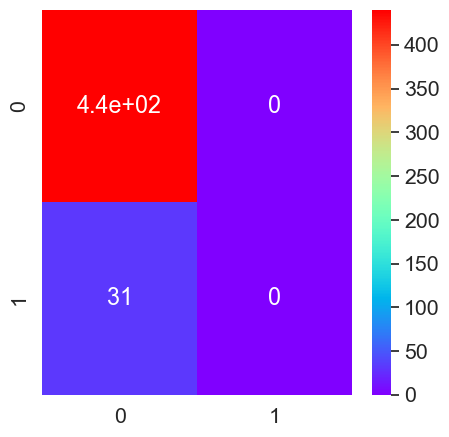

In [825]:
cm_svm = confusion_matrix(Y_test, pred_svm)
sns.heatmap(cm_svm, annot = True, cmap = 'rainbow')

In [826]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision_svm, recall_svm, f1_score_svm, support_svm = precision_recall_fscore_support(Y_test, pred_svm, average = 'macro')
print('Precision Score :', '%0.2f' % precision_svm)
print('Recall Score :', '%0.2f' % recall_svm)
print('F1-Score:', '%0.2f' % f1_score_svm)
svm_acc_test= accuracy_score(Y_test, pred_svm)
svm_acc_train = clf.score(X_train,Y_train)
print('Train Accuracy Score :','%0.2f' % svm_acc_train)
print('Test Accuracy Score :','%0.2f' % svm_acc_test)

Precision Score : 0.47
Recall Score : 0.50
F1-Score: 0.48
Train Accuracy Score : 0.94
Test Accuracy Score : 0.93


In [827]:
print(classification_report(Y_test, pred_svm, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
           0       0.93      1.00      0.97       440

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [ ]:
Hyperparameter Tuning using SVM

In [828]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm_grid = GridSearchCV(SVC(), svm_param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svm_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [830]:
print(svm_grid.best_params_) 
print(svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [831]:
svm_grid_predictions = svm_grid.predict(X_test) 
  
# print classification report 
print(classification_report(Y_test, svm_grid_predictions)) 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [832]:
precision_svm_tune, recall_svm_tune, f1_score_svm_tune, support_svm_tune = precision_recall_fscore_support(Y_test, svm_grid_predictions, average = 'macro')
print('Precision Score :', '%0.2f' % precision_svm_tune)
print('Recall Score :', '%0.2f' % recall_svm_tune)
print('F1-Score:', '%0.2f' % f1_score_svm_tune)
svm_tune_acc_test= accuracy_score(Y_test, svm_grid_predictions)
svm_tune_acc_train = clf.score(X_train,Y_train)
print('Train Accuracy Score :','%0.2f' % svm_tune_acc_train)
print('Test Accuracy Score :','%0.2f' % svm_tune_acc_test)

Precision Score : 0.47
Recall Score : 0.50
F1-Score: 0.48
Train Accuracy Score : 0.94
Test Accuracy Score : 0.93


Both the models above, has not predicted the passing class as we see very low precision and recall score from the classification report.

In [833]:
from sklearn.neighbors import KNeighborsClassifier

In [834]:
knn = KNeighborsClassifier(n_neighbors=3)

In [835]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [836]:
y_pred_knn = knn.predict(X_test)

<Axes: >

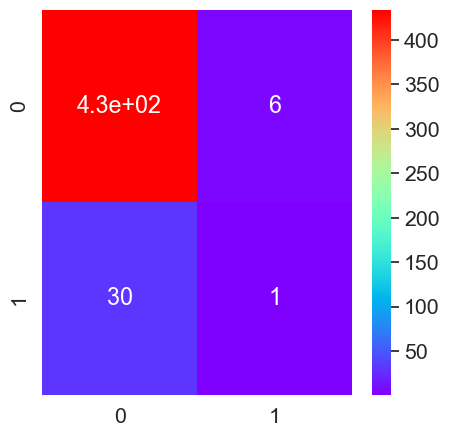

In [838]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(cm_knn, annot = True, cmap = 'rainbow')

In [839]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision_knn, recall_knn, f1_score_knn, support_knn = precision_recall_fscore_support(Y_test, y_pred_knn, average = 'macro')
print('Precision Score :', '%0.2f' % precision_knn)
print('Recall Score :', '%0.2f' % recall_knn)
print('F1-Score:', '%0.2f' % f1_score_knn)
knn_acc_test = accuracy_score(Y_test, y_pred_knn)
knn_acc_train = knn.score(X_train,Y_train)
print('Train Accuracy Score :','%0.2f' % knn_acc_train)
print('Test Accuracy Score :','%0.2f' % knn_acc_test )

Precision Score : 0.54
Recall Score : 0.51
F1-Score: 0.51
Train Accuracy Score : 0.95
Test Accuracy Score : 0.92


In [840]:
print(classification_report(Y_test, y_pred_knn, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.14      0.03      0.05        31
           0       0.94      0.99      0.96       440

    accuracy                           0.92       471
   macro avg       0.54      0.51      0.51       471
weighted avg       0.88      0.92      0.90       471



From the above report, we see that the precision and recall values are very low for the passing class and the model accuracy is biased towards failure class only. The confusion matrix shows only 1 datapoint is predicted correctly in the passing class and gives an error rate. 

In [843]:
knn_param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Define the KNN classifier
knn_tune = KNeighborsClassifier()

# Define the grid search object
knn_grid = GridSearchCV(knn_tune, knn_param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
knn_grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [844]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", knn_grid.best_params_)
print("Best Accuracy:", knn_grid.best_score_)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.9361311747613117


In [847]:
# Train and evaluate the model with the best hyperparameters
best_knn_tune = KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'],
                                 weights=knn_grid.best_params_['weights'],
                                 algorithm=knn_grid.best_params_['algorithm'],
                                 p= knn_grid.best_params_['p'])
best_knn_tune.fit(X_train, Y_train)
y_pred_knn_tune = best_knn_tune.predict(X_test)


In [848]:
precision_knn_tune, recall_knn_tune, f1_score_knn_tune, support_knn_tune = precision_recall_fscore_support(Y_test, y_pred_knn_tune, average = 'macro')
print('Precision Score :', '%0.2f' % precision_knn_tune)
print('Recall Score :', '%0.2f' % recall_knn_tune)
print('F1-Score:', '%0.2f' % f1_score_knn_tune)
knn_tune_acc_test = accuracy_score(Y_test, y_pred_knn_tune)
knn_tune_acc_train = knn.score(X_train,Y_train)
print('Train Accuracy Score :','%0.2f' % knn_tune_acc_train)
print('Test Accuracy Score :','%0.2f' % knn_tune_acc_test )

Precision Score : 0.47
Recall Score : 0.50
F1-Score: 0.48
Train Accuracy Score : 0.95
Test Accuracy Score : 0.93


# 6. Post Training and Conclusion 

A. Display and compare all the models designed with their train and test accuracies. 

In [849]:
model_list = []
model_list.append(['RF with Balanced Data', rf_normal_acc_train * 100, rf_normal_acc_test * 100, recall_rf_normal * 100, precision_rf_normal * 100,f1_score_rf_normal*100])
model_list.append(['Logistic with Balanced Data', lr_acc_train * 100, lr_acc_test * 100, recall_lr * 100, precision_lr * 100,f1_score_lr*100])
model_list.append(['RF After Tuning', rf_tune_acc_train * 100, rf_tune_acc_test * 100, recall_rf_tune * 100, precision_rf_tune* 100,f1_score_rf_tune*100])
model_list.append(['RF After PCA', rf_pca_acc_train * 100, rf_pca_acc_test * 100, recall_rf_pca * 100, precision_rf_pca* 100,f1_score_rf_pca*100])
model_list.append(['SVM with PCA before tuning',svm_acc_train * 100, svm_acc_test* 100, recall_svm * 100, precision_svm * 100,f1_score_svm *100])
model_list.append(['SVM with PCA after tuning', svm_tune_acc_train * 100, svm_tune_acc_test* 100, recall_svm_tune * 100, precision_svm_tune * 100,f1_score_svm_tune *100])
model_list.append(['KNN with PCA before tuning',knn_acc_train * 100, knn_acc_test * 100, recall_knn * 100, precision_knn * 100,f1_score_knn *100])
model_list.append(['KNN with PCA after tuning',knn_tune_acc_train * 100, knn_tune_acc_test * 100, recall_knn_tune * 100, precision_knn_tune * 100,f1_score_knn_tune *100])
model_df = pd.DataFrame(model_list, columns = ['Model', 'Accuracy on Train', 'Accuracy on Test', 'Recall Score', 'Precision Score','F1 Score'])
model_df

,Model,Accuracy on Train,Accuracy on Test,Recall Score,Precision Score,F1 Score
0,RF with Balanced Data,100.000000,99.088838,99.088838,99.089857,99.088834
1,Logistic with Balanced Data,95.068359,92.027335,92.027335,92.453809,92.007262
2,RF After Tuning,99.462891,96.469248,96.469248,96.539037,96.467924
3,RF After PCA,93.521898,93.418259,50.000000,46.709130,48.298573
4,SVM with PCA before tuning,94.069343,93.418259,50.000000,46.709130,48.298573
5,SVM with PCA after tuning,94.069343,93.418259,50.000000,46.709130,48.298573
6,KNN with PCA before tuning,94.981752,92.356688,50.931085,53.910099,50.640429
7,KNN with PCA after tuning,94.981752,92.781316,49.659091,46.688034,48.127753


B. Select the final best trained model along with your detailed comments for selecting this model.

1. From the above table, we infer that Random forest model performs well on the balanced dataset and after tuning with hyperparameters. RF doesn't perform well after PCA.
2. However, none of the models work well after performing PCA on the dataset. Though it yields high accuracy, most of the models predict only the failure class which is evident from the precision and recall score.
3. Hence, we conclude that RF is the best trained model with high accuracy on train (99%) and test (96%) datasets before PCA.

C. Pickle the selected model for future use

In [856]:
import pickle

In [857]:
with open('model_pkl', 'wb') as files:
    pickle.dump(rfc1, files)

In [858]:
# load saved model
with open('model_pkl' , 'rb') as f:
    rf = pickle.load(f)

D. Write your conclusion on the results. 

# Conclusion
Based on the overall analysis and performances of the model we can go ahead and narrow down the observations that are common to the test set and infer that these are likely to fail. This needs to be checked with a domain specialist to get an acceptable threshold limit of the error rate and would be able choose the best performing model based on that. 
As far as PCA is considered, the models does better without it, Random Forest with hyperparameter tuning gives the best overall results.